In [1]:
!pip install diffusers["torch"] transformers
!pip install accelerate
!pip install git+https://github.com/huggingface/diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 35.1 MB/s eta 0:00:00
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-deul_6ao
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-deul_6ao
  Resolved https://github.com/huggingface/diffusers to commit 8bf046b7fb8aa41691cb42596313038868b251ac
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.26.0.dev0-py3-none-any.whl size=1944853 sha256=b4cfda1883b17265e8500a8ad9a4055c7a5a3cbf3d746dd0f77fe1f66450e850
  Stored in directory: /tmp/pip-ephem-wheel-cache-nx5cpv5m/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffuser

unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

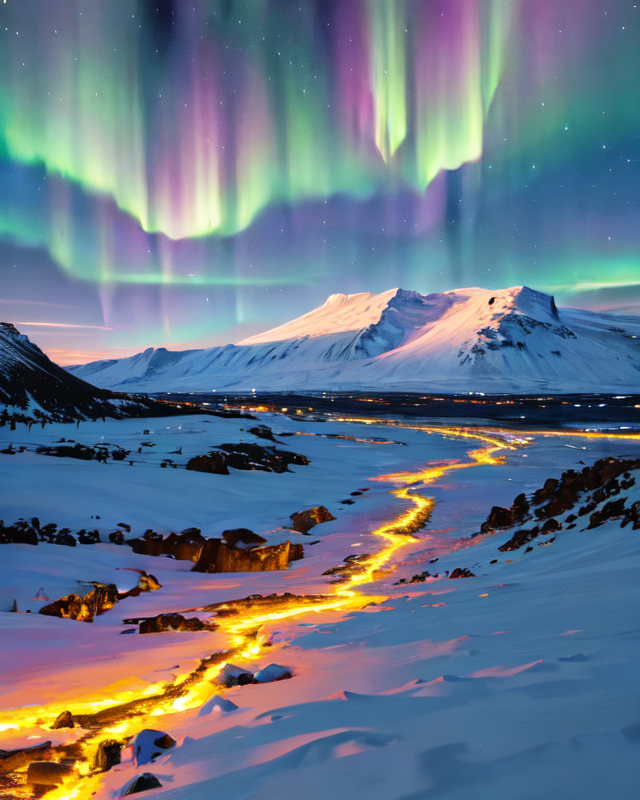

In [13]:
!pip install accelerate
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("redstonehero/cetusmix_v4", torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.safety_checker = None

prompt = "A realistic landscape shot of the Northern Lights dancing over a snowy mountain range in Iceland, with long exposure to capture the motion and vibrant colors."
h=800
w=640
steps=25
guidance=7.5
neg = "easynegative, human, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worstquality, low quality, normal quality, jpegartifacts, signature, watermark, username, blurry, bad feet, cropped, poorly drawn hands, poorly drawn face, mutation, deformed, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, extra fingers, fewer digits, extra limbs, extra arms,extra legs, malformed limbs, fused fingers, too many fingers, long neck, cross-eyed,mutated hands, polar lowres, bad body, bad proportions, gross proportions, text, error, missing fingers, missing arms, missing legs, extra digit, extra arms, extra leg, extra foot,"

image = pipe(prompt, height=h, width=w, num_inference_steps=steps, guidance_scale=guidance, negative_prompt=neg).images[0]
image